In [26]:
import numpy as np
import h5py
from pathlib import Path
import scipy.stats as stats
import pandas as pd
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


In [27]:

# scatter plot of SRR: before and after
def plot_SRR_before_after(valid_units, before_srr, after_srr, label, output_folder: str = './'):
    n_valid_sites = np.sum(valid_units)
    colors = ['red' if p == True else 'gray' for p in valid_units]

    corr_srr = np.corrcoef(before_srr, after_srr)[0,1]
    corr_srr_valids = np.corrcoef(before_srr[valid_units], after_srr[valid_units])[0,1]
    # print correlation coefficients up to 3 decimal places
    
    plt.figure(figsize=(5, 5))
    plot_range = [-1/2, 1]

    # plot unity line
    plt.plot(plot_range, plot_range, linestyle=':', color='black')
    
    plt.scatter(before_srr, after_srr, alpha=0.5, c=colors)
    plt.xlim(plot_range)
    plt.ylim(plot_range)

    plt.xlabel('SRR_before')
    plt.ylabel('SRR_after')
        
    plt.title(f"Normalizers: before & after \n{label} \ncorr_all: {corr_srr:.2f} corr_valids: {corr_srr_valids:.2f}\n ''valid'' sites: {n_valid_sites} (out of total 288)")
    plt.ylim(plot_range)

    # Create custom legend handles
    legend_handles = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Sites with p_value < 0.05'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Sites with p_value >= 0.05'),
    ]

    # Add legend
    plt.legend(handles=legend_handles)

    # save out plot to pdf
    plt.savefig(f"{output_folder}/srr_norm_{label}.pdf")

# plt.show()



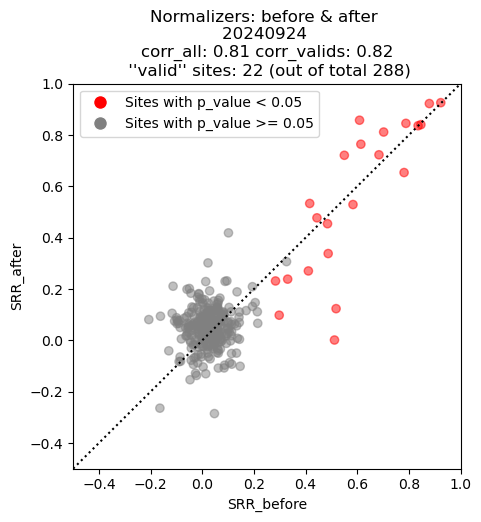

In [28]:
nwb_folder_path = Path("/Users/yoon/Downloads/nwb_files/20240924")
# List of all CSV files in the folder
qc_files = [file for file in nwb_folder_path.iterdir() if file.suffix == '.csv']
qc_before = pd.read_csv(qc_files[0])
qc_after = pd.read_csv(qc_files[1])

# before_srr = qc_before['half_split_reliability']
# after_srr = qc_after['half_split_reliability']
before_srr = qc_before['single_repeat_reliability']
after_srr = qc_after['single_repeat_reliability']
valid_units = qc_before['valid_unit']

plot_SRR_before_after(valid_units, before_srr, after_srr, '20240924', Path.cwd())

In [30]:
qc_files

[PosixPath('/Users/yoon/Downloads/nwb_files/20240924/MonkeyValence_Apollo_normalizers_240924_123021_3.1_thresholded_QC.csv'),
 PosixPath('/Users/yoon/Downloads/nwb_files/20240924/MonkeyValence_Apollo_normalizers_240924_151135_3.1_thresholded_QC.csv')]

In [32]:
qc_files[0].parent

PosixPath('/Users/yoon/Downloads/nwb_files/20240924')